In [359]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#using matplotlib’s ggplot style
plt.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)
from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition,linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier,Lasso,LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,f1_score,roc_auc_score,precision_recall_curve,roc_curve,auc
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier

In [75]:
path ='/Users/gyang/Desktop/yang_project/capstone/data/'

## Independent Variable

In [212]:
total = pd.read_csv(path + 'all_year.csv')

In [280]:
state_list =total.GeoName.unique().tolist()

In [282]:
def clean_state_data(state):
    df_1 =total_1.loc[total['GeoName'] == state]
    df_2 =df_1.set_index(['GeoName','year'])
    df_3 =df_2.replace({'(NA)': np.nan ,'(L)':np.nan ,0:np.nan})
    
    #check missing value 

    miss_col = df_3
    miss_col2 = miss_col.isnull().sum(axis =0)/float(len(miss_col))
    miss_col3 =miss_col2.sort_values(ascending=False)
    
    columns = df_3.columns
    missing_value_df = pd.DataFrame({'percent_missing': miss_col3})
    missing_value_df['percent_missing'] =missing_value_df['percent_missing'].astype('float64')
    
    miss_col =missing_value_df.loc[(missing_value_df['percent_missing'] >0) 
                               &(missing_value_df['percent_missing'] <0.4)].index.tolist()
    
    #drop columns with large missing
    del_list = missing_value_df.loc[(missing_value_df['percent_missing'] >=0.4)].index.tolist()
    df_4 = df_3.drop(columns=del_list)

    #convert NAN to -99999
    df_5 = df_4.fillna(-99999)

    #change type of columns
    convert_col =df_5.select_dtypes(include=['object']).columns.values

    for i in convert_col:
        df_5[i] = df_5[i].astype('float')

    df_6 = df_5.copy()

    #replace -99999 to mean()
    for i in miss_col:
        df_6[i] =df_6[i].replace({-99999: df_6[i].mean()})

    df_7 = df_6.copy()

    #numerical feature scaling
    scaler = MinMaxScaler()
    col =df_7.columns.values
    df_7[col] = scaler.fit_transform(df_7[col])
    
    return df_7

In [291]:
Alabama =clean_state_data(state_list[0])
Alaska =clean_state_data(state_list[1])
Arizona =clean_state_data(state_list[2])
Arkansas =clean_state_data(state_list[3])
California =clean_state_data(state_list[4])
Colorado =clean_state_data(state_list[5])
Connecticut =clean_state_data(state_list[6])
Delaware =clean_state_data(state_list[7])
DC =clean_state_data(state_list[8])
Florida =clean_state_data(state_list[9])
Georgia =clean_state_data(state_list[10])
Hawaii =clean_state_data(state_list[11])
Idaho =clean_state_data(state_list[12])
Illinois =clean_state_data(state_list[13])
Indiana =clean_state_data(state_list[14])
Iowa =clean_state_data(state_list[15])
Kansas =clean_state_data(state_list[16])
Kentucky =clean_state_data(state_list[17])
Louisiana =clean_state_data(state_list[18])
Maine =clean_state_data(state_list[19])
Maryland =clean_state_data(state_list[20])
Massachusetts =clean_state_data(state_list[21])
Michigan =clean_state_data(state_list[22])
Minnesota =clean_state_data(state_list[23])
Mississippi =clean_state_data(state_list[24])
Missouri =clean_state_data(state_list[25])
Montana =clean_state_data(state_list[26])
Nebraska =clean_state_data(state_list[27])
Nevada =clean_state_data(state_list[28])
NewHampshire =clean_state_data(state_list[29])
NewJersey =clean_state_data(state_list[30])
NewMexico =clean_state_data(state_list[31])
NewYork =clean_state_data(state_list[32])
NorthCarolina =clean_state_data(state_list[33])
NorthDakota =clean_state_data(state_list[34])
Ohio =clean_state_data(state_list[35])
Oklahoma =clean_state_data(state_list[36])
Oregon =clean_state_data(state_list[37])
Pennsylvania =clean_state_data(state_list[38])
RhodeIsland =clean_state_data(state_list[39])
SouthCarolina =clean_state_data(state_list[40])
SouthDakota =clean_state_data(state_list[41])
Tennessee =clean_state_data(state_list[42])
Texas =clean_state_data(state_list[43])
Utah =clean_state_data(state_list[44])
Vermont =clean_state_data(state_list[45])
Virginia =clean_state_data(state_list[46])
Washington =clean_state_data(state_list[47])
WestVirginia =clean_state_data(state_list[48])
Wisconsin =clean_state_data(state_list[49])
Wyoming =clean_state_data(state_list[50])

In [296]:
# split data
def split_data(data):
    x_train,x_test =data.iloc[:16,],data.iloc[16:,]
    return x_train,x_test

In [299]:
# split data

x_train_alabama,x_test_alabama =split_data(Alabama)
x_train_alaska,x_test_alaska =split_data(Alaska)
x_train_arizona,x_test_arizona =split_data(Arizona)
x_train_arkansas,x_test_arkansas =split_data(Arkansas)
x_train_california,x_test_california =split_data(California)
x_train_colorado,x_test_colorado =split_data(Colorado)
x_train_connecticut,x_test_connecticut =split_data(Connecticut)
x_train_delaware,x_test_delaware =split_data(Delaware)
x_train_dc,x_test_dc =split_data(DC)
x_train_florida,x_test_florida =split_data(Florida)
x_train_georgia,x_test_georgia =split_data(Georgia)
x_train_hawaii,x_test_hawaii =split_data(Hawaii)
x_train_idaho,x_test_idaho =split_data(Idaho)
x_train_illinois,x_test_illinois =split_data(Illinois)
x_train_indiana,x_test_indiana =split_data(Indiana)
x_train_iowa,x_test_iowa =split_data(Iowa)
x_train_kansas,x_test_kansas =split_data(Kansas)
x_train_kentucky,x_test_kentucky =split_data(Kentucky)
x_train_louisiana,x_test_louisiana =split_data(Louisiana)
x_train_maine,x_test_maine =split_data(Maine)
x_train_maryland,x_test_maryland =split_data(Maryland)
x_train_massachusetts,x_test_massachusetts =split_data(Massachusetts)
x_train_michigan,x_test_michigan =split_data(Michigan)
x_train_minnesota,x_test_minnesota =split_data(Minnesota)
x_train_mississippi,x_test_mississippi =split_data(Mississippi)
x_train_missouri,x_test_missouri =split_data(Missouri)
x_train_nebraska,x_test_nebraska =split_data(Nebraska)
x_train_nevada,x_test_nevada =split_data(Nevada)
x_train_newhampshire,x_test_newhampshire =split_data(NewHampshire)
x_train_newjersey,x_test_newjersey =split_data(NewJersey)
x_train_newmexico,x_test_newmexico =split_data(NewMexico)
x_train_newyork,x_test_newyork =split_data(NewYork)
x_train_northcarolina,x_test_northcarolina =split_data(NorthCarolina)
x_train_northdakota,x_test_northdakota =split_data(NorthDakota)
x_train_ohio,x_test_ohio =split_data(Ohio)
x_train_oklahoma,x_test_oklahoma =split_data(Oklahoma)
x_train_oregon,x_test_oregon =split_data(Oregon)
x_train_pennsylvania,x_test_pennsylvania =split_data(Pennsylvania)
x_train_rhodeisland,x_test_rhodeisland =split_data(RhodeIsland)
x_train_southcarolina,x_test_southcarolina =split_data(SouthCarolina)
x_train_southdakota,x_test_southdakota =split_data(SouthDakota)
x_train_tennessee,x_test_tennessee =split_data(Tennessee)
x_train_texas,x_test_texas =split_data(Texas)
x_train_utah,x_test_utah =split_data(Utah)
x_train_vermont,x_test_vermont =split_data(Vermont)
x_train_virginia,x_test_virginia =split_data(Virginia)
x_train_washington,x_test_washington =split_data(Washington)
x_train_westvirginia,x_test_westvirginia =split_data(WestVirginia)
x_train_wisconsin,x_test_wisconsin =split_data(Wisconsin)
x_train_utah,x_test_utah =split_data(Utah)
x_train_wyoming,x_test_wyoming =split_data(Wyoming)

## Dependent Variable (SME Growth) 

SME Growth Increase (Comapare with last year) =1;Decrease =0 <br\>
1997 ~2016 Year

In [302]:
PATH2 ='/Users/gyang/Desktop/yang_project/capstone/data/dependent_variable_state_data_cleaned/'

In [375]:
al_df =pd.read_table(PATH2+'Alabama.txt',sep='/',header=None)
al_df.columns=['year','month','net_change','total_expand','expand_establish',
                'open_establish','total_contract','contract_establish','end_establish']
al_year = al_df.groupby(['year'], as_index=False)[['expand_establish']].mean()
al_year['year'] = al_year['year'].astype('int64')

In [376]:
al_year['lag_growth'] = al_year['expand_establish'].shift(1)
al_year2 =al_year.loc[al_year['year'].isin([1997,1998,1999,2000,2001,2002,2003,2004,2005,
                                          2006,2007,2008,2009,2010,2011,2012,2013,2014,
                                          2015,2016])]
al_year2['growth_change'] =al_year2['expand_establish'] - al_year2['lag_growth']

#create dependent variable
al_year2['growth_trend'] = np.where(al_year2['growth_change'] >=0, 1, 0)
al_year2['growth_trend'] = al_year2['growth_trend'].astype('int')

al_year3 =al_year2[['year','growth_trend']].set_index(['year'])

#split train and test data
y_train_alabama, y_test_alabama =np.array(al_year3.iloc[:16,]).ravel() ,np.array(al_year3.iloc[16:,]).ravel()

/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [390]:
print(y_train_alabama.shape)
print(y_test_alabama.shape)

(16,)
(4,)


# Data Modeling

## Random Forest

In [378]:
#random forest
rf_classifer = RandomForestClassifier(random_state=42)

grid_rf = {'bootstrap': [True],
 'max_depth': [5,10, 15], 
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2 ],
 'min_samples_split': list(range(2, 5))}

rfc = GridSearchCV(estimator=rf_classifer, param_grid=grid_rf, cv=3)

rfc.fit(x_train_alabama, y_train_alabama)
y_pred_rfc = rfc.best_estimator_.fit(x_train_alabama, y_train_alabama).predict(x_test_alabama)

In [379]:
rfc_acc =accuracy_score(y_test_alabama, y_pred_rfc)
rfc_acc

0.25

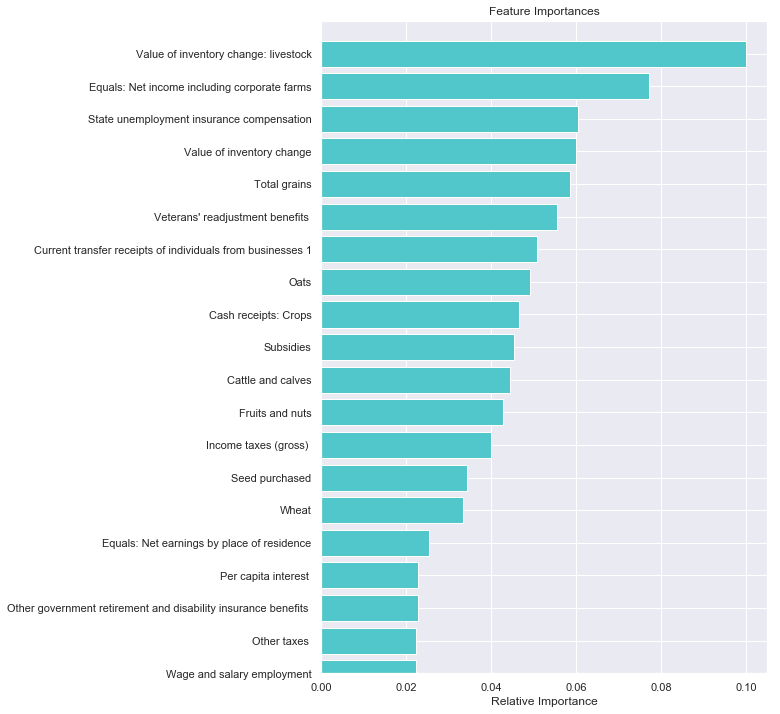

In [380]:
### Feature selection
feature_importances_rf = pd.DataFrame(rfc.best_estimator_.feature_importances_,index = x_train_alabama.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)

# feature importance plot
importances_rf = rfc.best_estimator_.feature_importances_
indices_rf = np.argsort(importances_rf)

plt.figure(figsize=(8,12))
plt.title('Feature Importances')
plt.xlabel('Relative Importance')

top_n =20
plt.barh(np.arange(top_n), importances_rf[indices_rf[-top_n:]],color='#51C7CB')

plt.yticks(np.arange(top_n), x_train_alabama.columns[indices_rf[-top_n:]])
plt.ylim(0, top_n)

plt.show()

In [381]:
#Top 20 important features
select_feature_list =feature_importances_rf[:20].index.tolist()
select_feature_list

['Value of inventory change: livestock',
 'Equals: Net income including corporate farms',
 'State unemployment insurance compensation',
 'Value of inventory change',
 'Total grains',
 "Veterans' readjustment benefits ",
 'Current transfer receipts of individuals from businesses 1',
 'Oats',
 'Cash receipts: Crops',
 'Subsidies',
 'Cattle and calves',
 'Fruits and nuts',
 'Income taxes (gross) ',
 'Seed purchased',
 'Wheat',
 'Equals: Net earnings by place of residence',
 'Other government retirement and disability insurance benefits ',
 'Per capita interest ',
 'Wage and salary employment',
 'Other taxes ']

In [382]:
x_train_alabama_res, x_test_alabama_res =x_train_alabama.loc[:, select_feature_list],x_test_alabama.loc[:, select_feature_list]

In [383]:
x_train_alabama_res.shape

(16, 20)

In [384]:
#random forest
rf_classifer = RandomForestClassifier(random_state=42)

grid_rf = {'bootstrap': [True],
 'max_depth': [5,10, 15], 
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2 ],
 'min_samples_split': list(range(2, 5))}

rfc = GridSearchCV(estimator=rf_classifer, param_grid=grid_rf, cv=3)

rfc.fit(x_train_alabama_res, y_train_alabama)
y_pred_rfc_res = rfc.best_estimator_.fit(x_train_alabama_res, 
                                         y_train_alabama).predict(x_test_alabama_res)

In [385]:
rfc_acc_res =accuracy_score(y_test_alabama, y_pred_rfc_res)
rfc_acc_res

0.25

## Xgboost

In [386]:
xgb_classifer =XGBClassifier(n_estimators=5,seed=42)

grid_xgb = {#'min_child_weight': [1, 5, 10],
        #'colsample_bytree': [0.8, 1.0, 1.2],
        'subsample': [0.6, 0.8,1],
        'max_depth': [5,10,15],
        'learning_rate': [0.1,0.2,0.3]
            
}

xgb = GridSearchCV(estimator=xgb_classifer, param_grid =grid_xgb,cv=6)

In [387]:
xgb.fit(x_train_alabama_res, y_train_alabama)

y_pred_xgb = xgb.best_estimator_.fit(x_train_alabama_res, y_train_alabama).predict(x_test_alabama_res)

In [388]:
xgb_acc_res =accuracy_score(y_test_alabama, y_pred_xgb)
xgb_acc_res

0.25